# Appendix E.1 Before pathological anatomy calculations, 1784 to 1822

In [3]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from process_improvement import xmr_charts as xmr
from process_improvement import comparison_charts as cc

%matplotlib inline

## Step 1. Gather the data

In [5]:
# Get data
def get_data(dataset_url) -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Vienna url
vienna_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation/refs/heads/main/data/pathological-anatomy-death-to-birth-rates.csv'

# Vienna General dataset url
vienna_df = get_data(vienna_url)

# Specifiy 'Year' column dtype as string
vienna_df['Year'] = vienna_df['Year'].astype('string')

# Show first 10 lines of vienna_df
vienna_df.columns

Index(['Hospital', 'Stage', 'Year', 'Births', 'Deaths', 'Rate', 'Note'], dtype='object')

### Drop unnecessary columns from vienna_df

In [6]:
vienna_df = vienna_df[[#'Hospital', 
                       'Stage', 
                       #'Month', 
                       'Year', 
                       #'Births', 
                       #'Deaths',
                       'Rate']]
vienna_df

,Stage,Year,Rate
0,Before pathological anatomy,1784,2.1
1,Before pathological anatomy,1785,1.4
2,Before pathological anatomy,1786,0.4
3,Before pathological anatomy,1787,0.4
4,Before pathological anatomy,1788,0.4
5,Before pathological anatomy,1789,0.6
6,Before pathological anatomy,1790,0.8
7,Before pathological anatomy,1791,0.6
8,Before pathological anatomy,1792,0.9
9,Before pathological anatomy,1793,2.6


### Split vienna_df into before_df and after_df

In [7]:
before_df = vienna_df[vienna_df['Stage'] == 'Before pathological anatomy'].copy()
after_df = vienna_df[vienna_df['Stage'] == 'After pathological anatomy'].reset_index(drop=True)

## Step 2. Calculate the moving ranges

In [8]:
# Calculate the moving ranges for after_df
before_df['Moving Ranges'] = abs(before_df['Rate'].diff())
before_df

,Stage,Year,Rate,Moving Ranges
0,Before pathological anatomy,1784,2.1,NaN
1,Before pathological anatomy,1785,1.4,0.7
2,Before pathological anatomy,1786,0.4,1.0
3,Before pathological anatomy,1787,0.4,0.0
4,Before pathological anatomy,1788,0.4,0.0
5,Before pathological anatomy,1789,0.6,0.2
6,Before pathological anatomy,1790,0.8,0.2
7,Before pathological anatomy,1791,0.6,0.2
8,Before pathological anatomy,1792,0.9,0.3
9,Before pathological anatomy,1793,2.6,1.7


## Step 3. Calculate the average moving range

In [9]:
# Calculate the average moving range for before_df['Moving Ranges']
before_ave_mR = round(before_df['Moving Ranges'].mean(),2)
before_ave_mR

0.85

## Step 4. Calculate the mean

In [10]:
# Calculate the mean before_df['Rate']
before_mean = round(before_df['Rate'].mean(),2)
before_mean

1.16

## Step 5. Calculate the process limits

In [11]:
# Upper Process Limit (UPL)
before_UPL = round(before_mean + (2.660*before_ave_mR),2)
# Lower Process Limit (LPL)
before_LPL = round(before_mean - (2.660*before_ave_mR),2)
before_LPL = max(0, before_LPL)
# Upper Process Limit (UPL)
before_URL = round(3.268*before_ave_mR,2)
# Show results
print('UPL', before_UPL)
print('LPL', before_LPL)
print('URL', before_URL)

UPL 3.42
LPL 0
URL 2.78


## Step 6. Put it all together

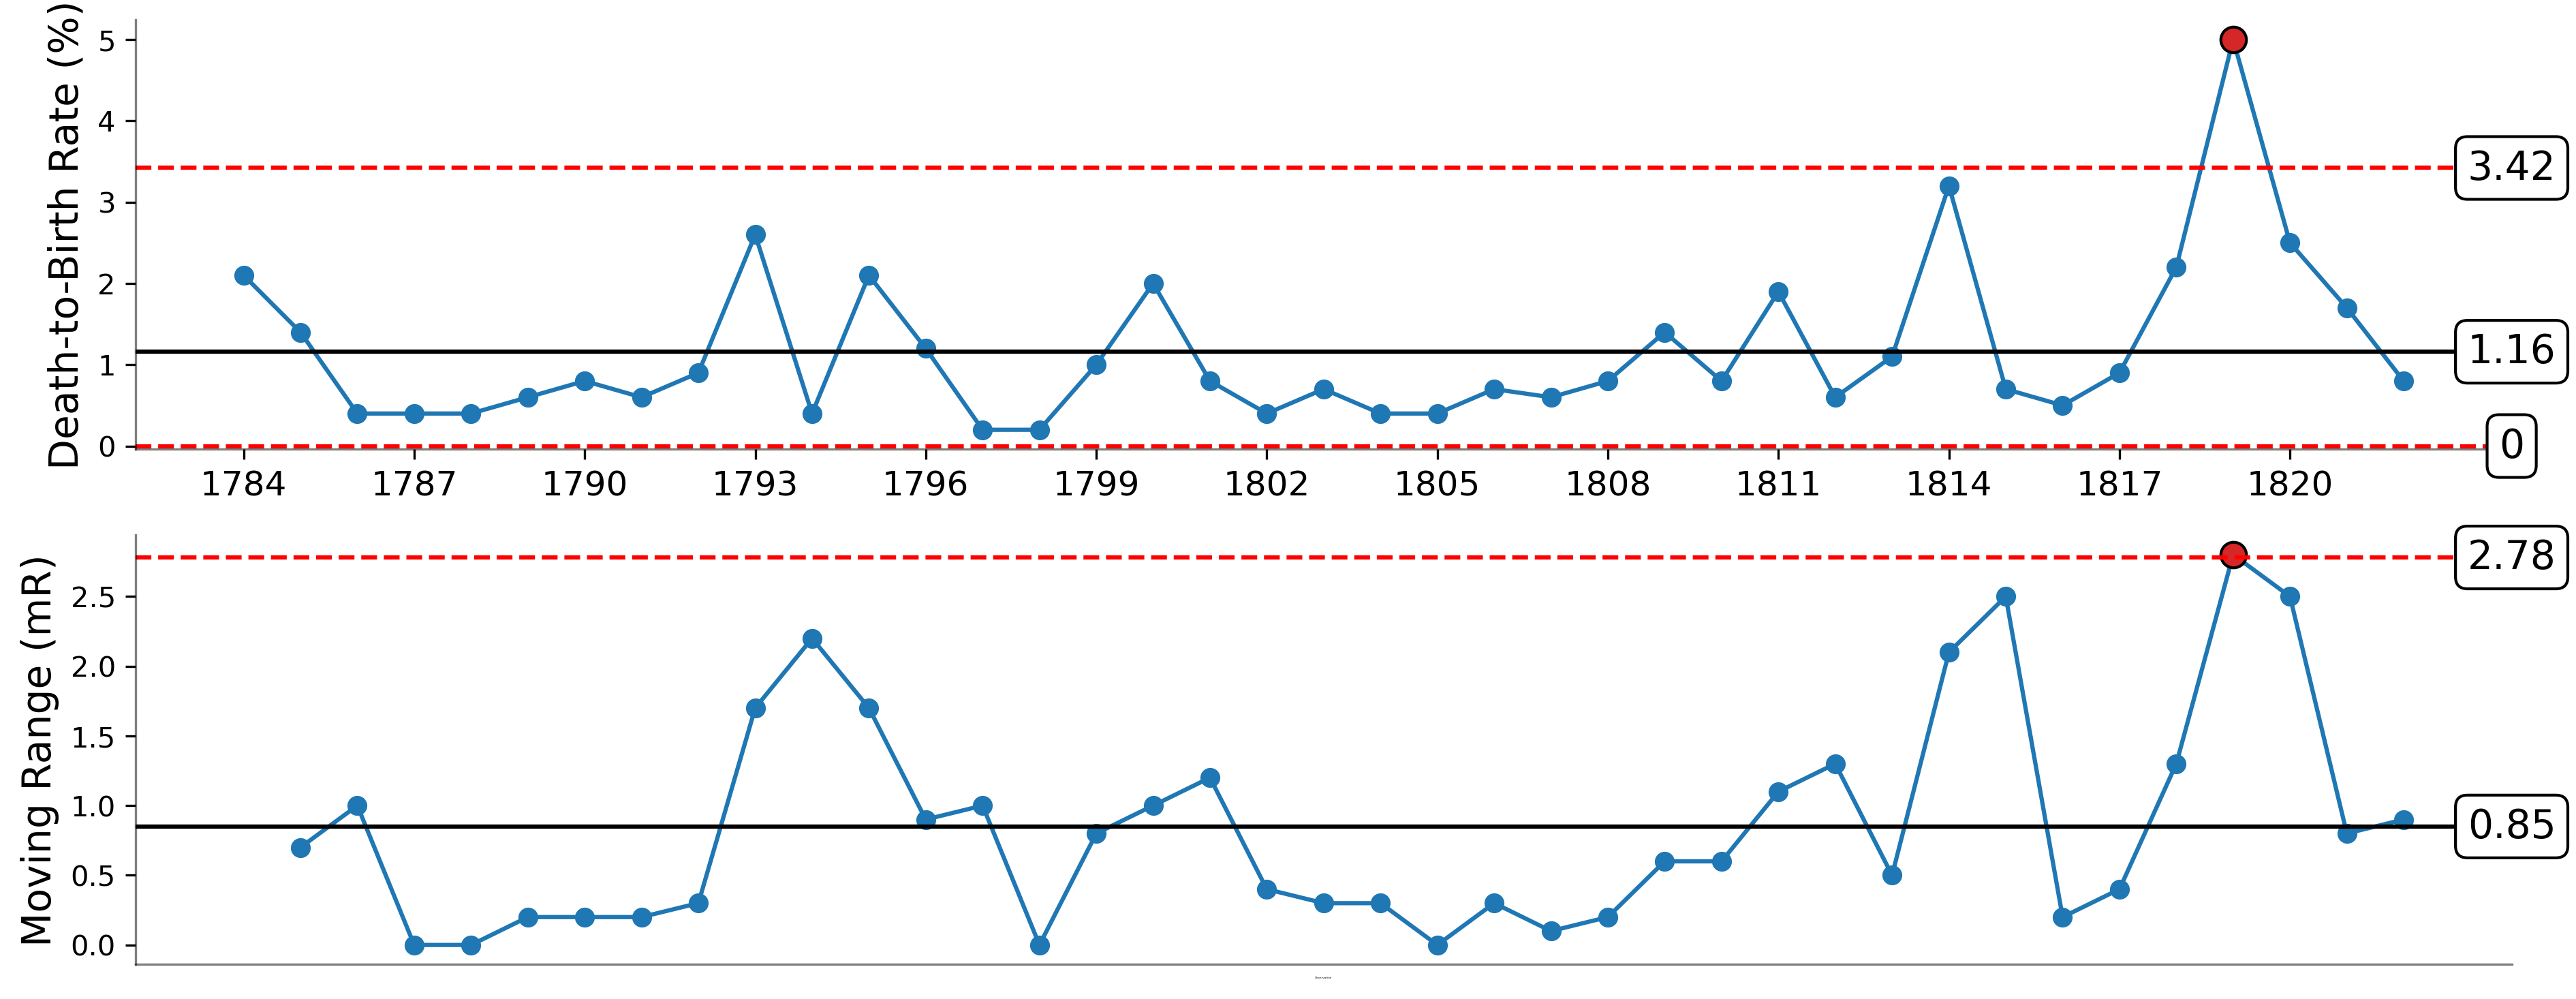

In [12]:
before_results = xmr.xmr_chart(before_df,
                                'Rate',
                                'Year',
                                tickinterval=3, 
                                round_value=2, 
                                label_fontsize=14,
                                xtick_fontsize=12, 
                                xchart_ylabel='Death-to-Birth Rate (%)')